# Video Game Sale Trends Over The Decades

In [9]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('vgsales.csv')
df_cleaned = df.dropna()
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


<p style="font-size:20px;">My dataset shows a list of different video games, the platform they are on, the year, genre, publisher and sales in different regions. They are also ranked from best selling to worst selling</p>

# Lab 3 Conclusions and findings

In [3]:
df_dropped = df.drop(columns=['Rank', 'Year'])
df_dropped.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


<p style="font-size:20px;">This is a summary of the numerical features of the dataset. Previously I stated in my original lab 3 notebook that this data does not have any missing but I have discovered that this is actually not true. Some of the data is missing, particular the sales features for certain regions. This is because some games are region specific and were not released for all regions. In this cases I will likely drop these rows to analyze the data when it makes sense to do so, if dropping these data points has significant contributions to my final conclusions I will mention it.</p>

## Research question: How have video game sales trends changed over the last 30 years across platforms and genres?
### Related Research Question 1: Which genres have grown or declined most in popularity over time?
### Related Research Question 2: What factors are most associated with a game's commercial success?

# Lab 4 Conclusions
<p style="font-size:20px;">In lab 4 I created k-means cluster graphs for my dataset but it did not fit the data very well. The research questions I am trying to answer are going to be dependent on analysis on the categorical and numerical features of my dataset but k-means clustering only works for numerical data. I did still create some k-means cluster graphs with the numerical features of my dataset and it did not provide any useful information and does not make sense for this particular data set.</p>

# Lab 5

In [4]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Optional: Drop any columns that won't be used in modeling (e.g., 'Name')
df_encoded = df_encoded.drop(columns=['Name'], errors='ignore')

# Improve display settings
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 3000)         # Prevent line wrapping
pd.set_option('display.max_rows', 20)        # Control max rows shown

# Transposed view to inspect the new features more easily
print("\n🔹 Transposed view of first 3 rows (easier to see all columns):")
print(df_encoded.head(3).T)


🔹 Transposed view of first 3 rows (easier to see all columns):
                                     0       1       2
Rank                                 1       2       3
Year                            2006.0  1985.0  2008.0
NA_Sales                         41.49   29.08   15.85
EU_Sales                         29.02    3.58   12.88
JP_Sales                          3.77    6.81    3.79
...                                ...     ...     ...
Publisher_id Software            False   False   False
Publisher_imageepoch Inc.        False   False   False
Publisher_inXile Entertainment   False   False   False
Publisher_mixi, Inc              False   False   False
Publisher_responDESIGN           False   False   False

[623 rows x 3 columns]


<p style="font-size:20px;">In the above code I converted the categorical features to use one-hot encoding, where each entry of each features gets its own column with a boolean value. This was done to convert the categorical features to numerical features in a way that we could calculate the MSE.</p>

In [5]:
# Step 1: Define your features (X) and target (y)
X = df_encoded.drop(columns=['Global_Sales'])  # All features except the target
y = df_encoded['Global_Sales']                # Target variable

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1.0 is better

# Optional: Check model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
pd.set_option('display.max_rows', 50)

# Now print the top 50 coefficients
print("Feature Coefficients (Top 50):")
print(coefficients.sort_values(key=abs, ascending=False).head(50))

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000
Feature Coefficients (Top 50):
JP_Sales                                  1.000297
EU_Sales                                  0.999987
NA_Sales                                  0.999962
Other_Sales                               0.999870
Publisher_Magical Company                 0.010942
Publisher_New                             0.010812
Publisher_Tetris Online                   0.010716
Publisher_Jester Interactive              0.010670
Publisher_Liquid Games                    0.010429
Publisher_NovaLogic                       0.010360
Publisher_Just Flight                    -0.010300
Publisher_White Park Bay Software         0.010216
Publisher_CCP                             0.010157
Publisher_Valcon Games                    0.010150
Publisher_Daedalic Entertainment          0.010027
Publisher_Time Warner Interactive         0.010013
Publisher_Simon & Schuster Interactive    0.009998
Publisher_NDA Producti

<p style="font-size:20px;">The feature coefficients above tell me that publishers and genre are not a very good indicator of global sales but I don't fully believe that is true. I will create some linear regression graphs for further analysis.</p>

In [6]:
X = df_encoded.drop(columns=['Global_Sales'])  # All features except the target
y = df_encoded['Global_Sales']                # Target variable

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Step 6: Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Step 7: Print RMSE
print(f"\n🔍 Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


🔍 Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0054


<p style="font-size:20px;">Based on the very low RMSE of .0054 I have a feeling this model is overfitting the data.</p>

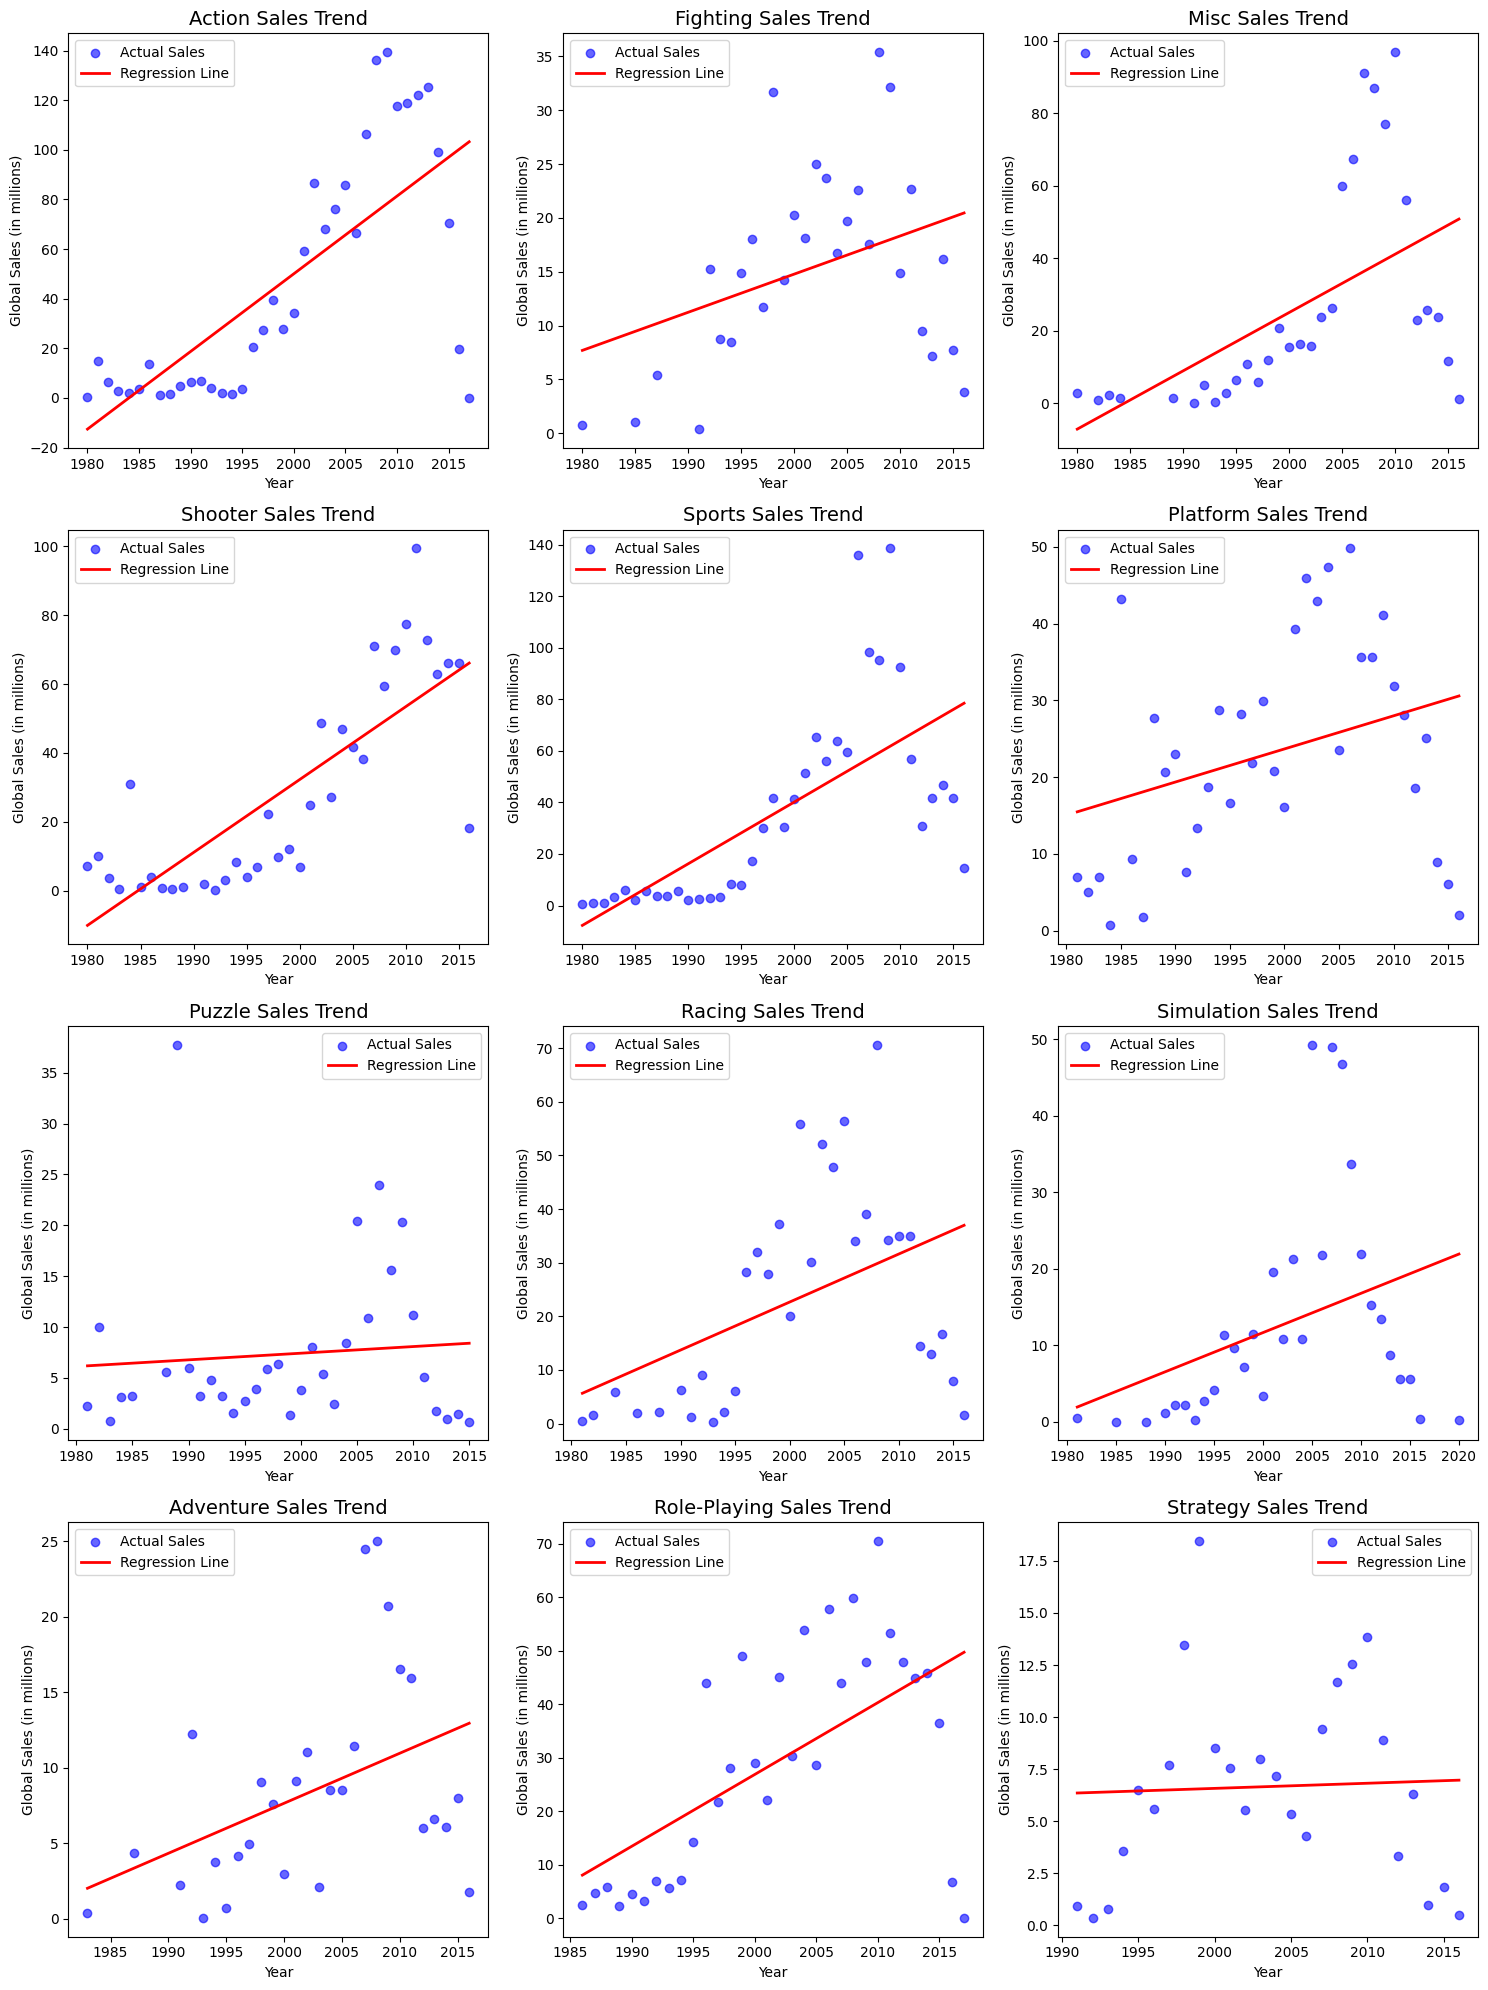

In [7]:
# Example: Aggregating by genre and year to get the total global sales for each combination
genre_sales = df_cleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Get the unique genres
genres = genre_sales['Genre'].unique()

# Set up the figure with subplots (you can adjust the grid size as needed)
num_genres = len(genres)
rows = (num_genres // 3) + (1 if num_genres % 3 != 0 else 0)  # Create enough rows for the grid
cols = 3  # Set number of columns for the grid (adjust as necessary)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each genre and plot the linear regression for each
for i, genre in enumerate(genres):
    ax = axes[i]
    
    # Get the data for the current genre
    genre_data = genre_sales[genre_sales['Genre'] == genre]
    
    # Prepare data for linear regression
    X = genre_data[['Year']]  # Independent variable (year)
    y = genre_data['Global_Sales']  # Dependent variable (global sales)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict sales using the model
    y_pred = model.predict(X)
    
    # Plot the actual sales and regression line
    ax.scatter(genre_data['Year'], genre_data['Global_Sales'], label='Actual Sales', color='blue', alpha=0.6)
    ax.plot(genre_data['Year'], y_pred, label='Regression Line', color='red', linestyle='-', linewidth=2)
    
    # Set plot labels and title
    ax.set_title(f'{genre} Sales Trend', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Global Sales (in millions)')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<p style="font-size:20px">Although the RMSE of the model was very low which I thought pointed to overfitting I believe it may have been caused by the need to encode the data in order to calculate the MSE and RMSE. After plotting the data for different genres across 30 years using the same linear regression model the data does not seem overfit at all and may actually provide some useful insight.</p>

# Lab 6: New findings

In [8]:
# One-hot encode
df_encoded = pd.get_dummies(df)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=False)

# Define sets
one_hot_columns = [col for col in df_encoded.columns if col.startswith('Platform_') or col.startswith('Genre_') or col.startswith('Publisher')]
target_columns = ['Global_Sales', 'EU_Sales', 'NA_Sales']  # numerical or other columns of interest

# Compute correlations: rows = one-hot, columns = targets
corr_subset = df_encoded[one_hot_columns + target_columns].corr()

# Slice to get only desired correlations (no intra-category correlations)
result = corr_subset.loc[one_hot_columns, target_columns]

print(result)

                                Global_Sales  EU_Sales  NA_Sales
Platform_2600                       0.011125 -0.018768  0.045841
Platform_3DO                       -0.004359 -0.003902 -0.004357
Platform_3DS                       -0.005865 -0.011151 -0.023896
Platform_DC                        -0.008304 -0.012664 -0.011000
Platform_DS                        -0.039130 -0.043404 -0.039832
...                                      ...       ...       ...
Publisher_id Software              -0.002533 -0.002253 -0.002326
Publisher_imageepoch Inc.          -0.003653 -0.003186 -0.003558
Publisher_inXile Entertainment     -0.002184 -0.001331 -0.002326
Publisher_mixi, Inc                 0.001610 -0.002253 -0.002516
Publisher_responDESIGN             -0.003335 -0.002751 -0.002953

[621 rows x 3 columns]


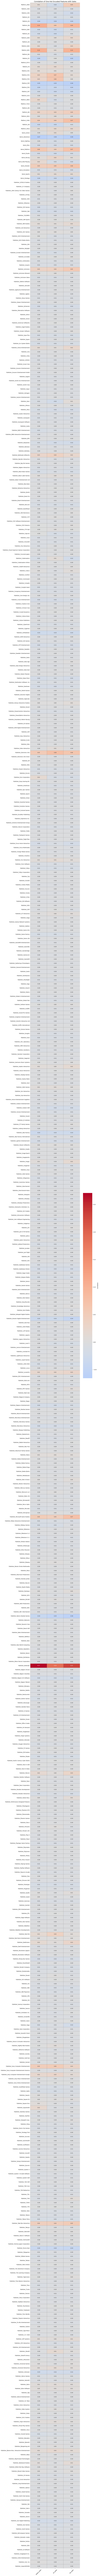

In [11]:
plt.figure(figsize=(12, len(result) * 0.5))  # auto-adjust height based on number of features

# Create heatmap
sns.heatmap(
    result,
    annot=True,             # show correlation values
    fmt=".2f",              # format decimal places
    cmap="coolwarm",        # color scheme
    center=0,               # center color on 0
    linewidths=0.5,         # lines between boxes
    linecolor='gray',       
    cbar_kws={'label': 'Correlation'}
)

plt.title("Correlation of One-Hot Encoded Features with Sales", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()